# wine-reviews预处理与数据分析

## 数据预处理

In [1]:
import numpy as np
import pandas as pd
data1 = pd.read_csv("E:\data mining\hw1\wine-reviews\winemag-data_first150k.csv")
data2 = pd.read_csv("E:\data mining\hw1\wine-reviews\winemag-data-130k-v2.csv")

In [2]:
data1.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
data2.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


我们发现在数据集1和数据集2中，由于读取文件时读入了序号，所以首先剔除掉多余的序号列，然后对数据集进行了去重处理。

### 剔除多余序号列

In [4]:
data1 = data1.drop('Unnamed: 0',axis=1,inplace=False)
data2 = data2.drop('Unnamed: 0',axis=1,inplace=False)

### 剔除重复数据信息

In [5]:
len1 = len(data1)
len2 = len(data2)
type1 = data1.duplicated().any()
type2 = data2.duplicated().any()
print(len1, type1)
print(len2, type2)

150930 True
129971 True


In [6]:
data1 = data1.drop_duplicates()
type1 = data1.duplicated().any()
len1 = len(data1)

data2 = data2.drop_duplicates()
type2 = data2.duplicated().any()
len2 = len(data2)

print(len1, type1)
print(len2, type2)

97851 False
119988 False


## 数据分析

### 检查数据集中各信息缺失值情况

进行缺失值检查后发现除了description、points、title和winery外，大部分数据信息都存在缺失项。

In [7]:
data1.isnull().any()

country         True
description    False
designation     True
points         False
price           True
province        True
region_1        True
region_2        True
variety        False
winery         False
dtype: bool

In [8]:
data2.isnull().any()

country                   True
description              False
designation               True
points                   False
price                     True
province                  True
region_1                  True
region_2                  True
taster_name               True
taster_twitter_handle     True
title                    False
variety                   True
winery                   False
dtype: bool

### 标称属性分析及可视化展示

def stans(num, datalen):
    print("number of classes:", len(num))
    print("number of missing data:", datalen-num.sum())
    print("the top 10 classes:\n", num[0:10])
    num[0:10].plot(kind="bar", figsize=(20,9))
    return

### 葡萄酒产地国家分布情况
可以看出数据集中的葡萄酒来自48个国家，其中产地为美国的葡萄酒数量最多，以下列出了产量最高的十个国家及其具体数量。

number of classes: 48
number of missing data: 3
the top 10 classes:
 US             40544
Italy          14850
France         14459
Spain           5443
Chile           3735
Portugal        3508
Argentina       3447
Australia       3152
Austria         1959
New Zealand     1865
Name: country, dtype: int64


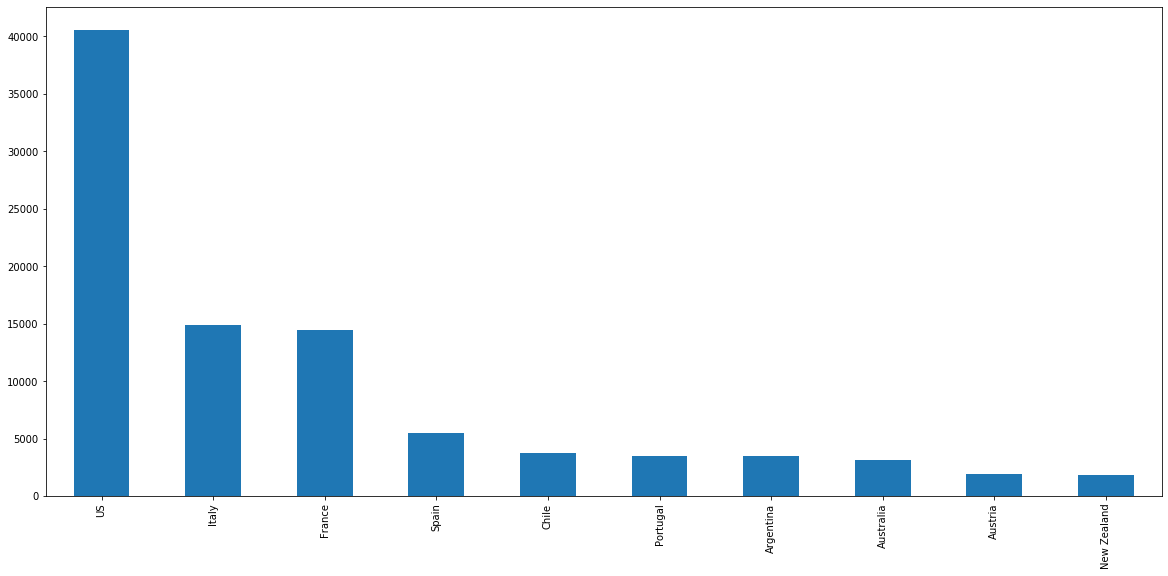

In [10]:
country1 = data1["country"].value_counts()
stans(country1, len1)

number of classes: 43
number of missing data: 59
the top 10 classes:
 US           50457
France       20353
Italy        17940
Spain         6116
Portugal      5256
Chile         4184
Argentina     3544
Austria       3034
Australia     2197
Germany       1992
Name: country, dtype: int64


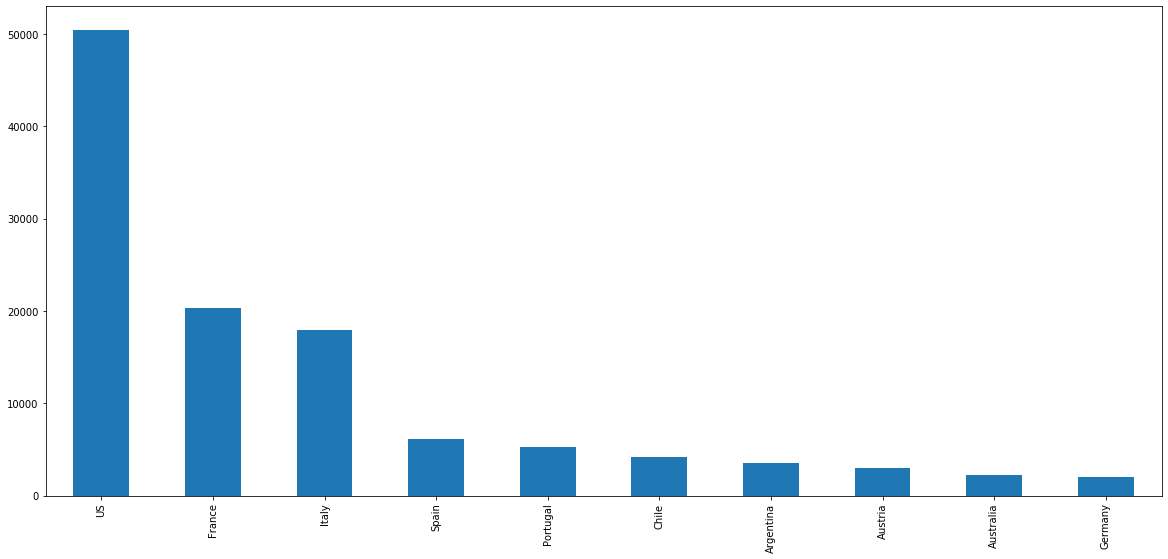

In [11]:
country2 = data2["country"].value_counts()
stans(country2, len2)

### 葡萄酒产地省份分布情况
除了记录了葡萄酒产地国家外，数据集还记录了具体的生产省份。这些葡萄酒来自多个国家四十多个省份，产量前十的省份也都来自产量前十的国家，以下列出了产量最高的十个省份及其具体数量。

number of classes: 455
number of missing data: 3
the top 10 classes:
 California          28800
Washington           6479
Tuscany              4611
Bordeaux             4434
Northern Spain       3196
Burgundy             2922
Mendoza Province     2921
Oregon               2869
Veneto               2518
Piedmont             2287
Name: province, dtype: int64


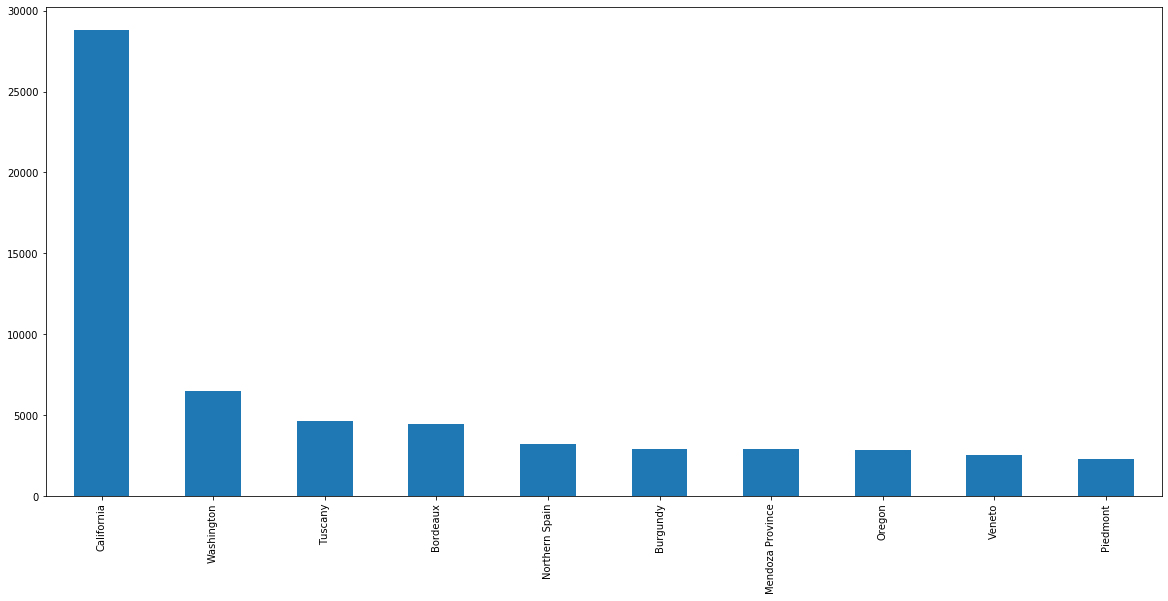

In [12]:
province1 = data1["province"].value_counts()
stans(province1, len1)

number of classes: 425
number of missing data: 59
the top 10 classes:
 California          33656
Washington           7965
Bordeaux             5556
Tuscany              5391
Oregon               4929
Burgundy             3683
Northern Spain       3554
Piedmont             3441
Mendoza Province     3038
Veneto               2501
Name: province, dtype: int64


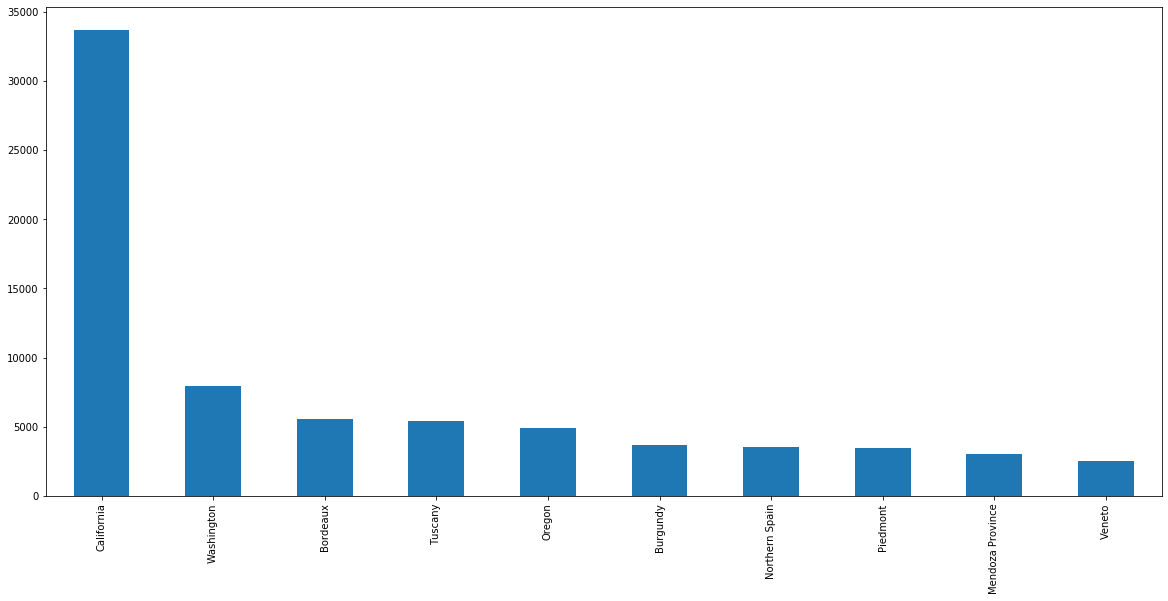

In [13]:
province2 = data2["province"].value_counts()
stans(province2, len2)

### 葡萄酒产地地区分布情况
除了记录了葡萄酒产地省份外，数据集还记录了具体的生产地区。这些葡萄酒来自一千多个地区，以下列出了产量最高的十个地区及其具体数量。

number of classes: 1236
number of missing data: 15932
the top 10 classes:
 Napa Valley             4131
Columbia Valley (WA)    3334
Russian River Valley    2302
California              2228
Mendoza                 2199
Paso Robles             1876
Willamette Valley       1276
Rioja                   1252
Alsace                  1241
Sonoma County           1155
Name: region_1, dtype: int64


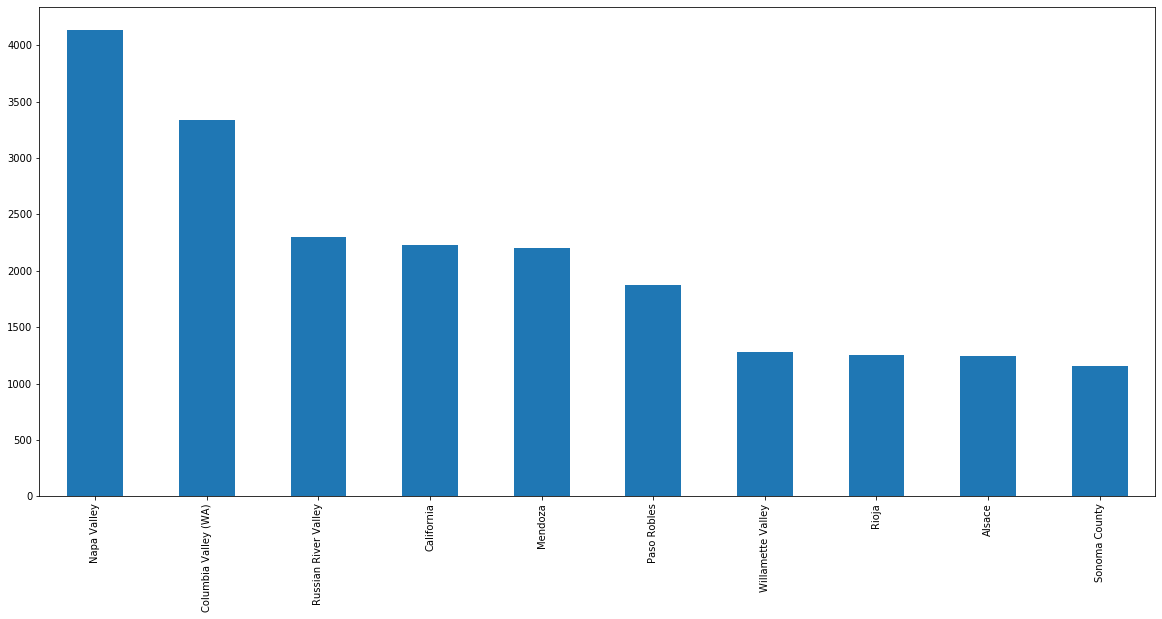

In [14]:
region_11 = data1["region_1"].value_counts()
stans(region_11, len1)

number of classes: 1229
number of missing data: 19560
the top 10 classes:
 Napa Valley             4174
Columbia Valley (WA)    3795
Russian River Valley    2862
California              2468
Paso Robles             2155
Mendoza                 2152
Willamette Valley       2111
Alsace                  1973
Champagne               1498
Barolo                  1493
Name: region_1, dtype: int64


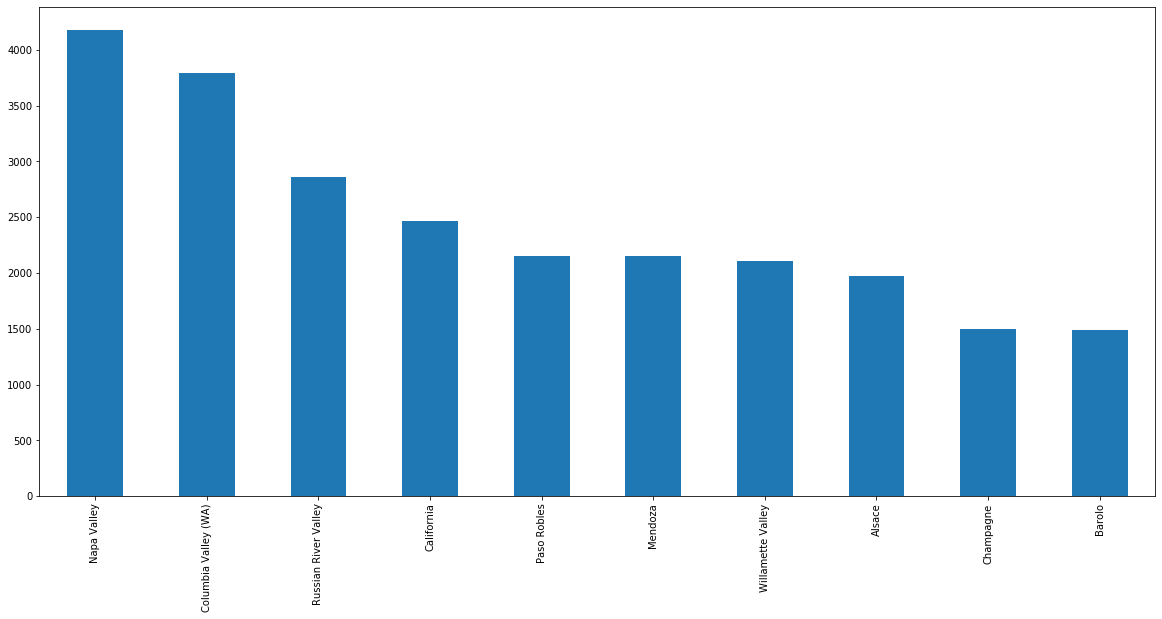

In [15]:
region_12 = data2["region_1"].value_counts()
stans(region_12, len2)

### 葡萄品种分布情况


number of classes: 632
number of missing data: 0
the top 10 classes:
 Pinot Noir                  9283
Chardonnay                  9163
Cabernet Sauvignon          8272
Red Blend                   6485
Bordeaux-style Red Blend    5176
Sauvignon Blanc             4037
Syrah                       3663
Riesling                    3585
Merlot                      3178
Zinfandel                   2409
Name: variety, dtype: int64


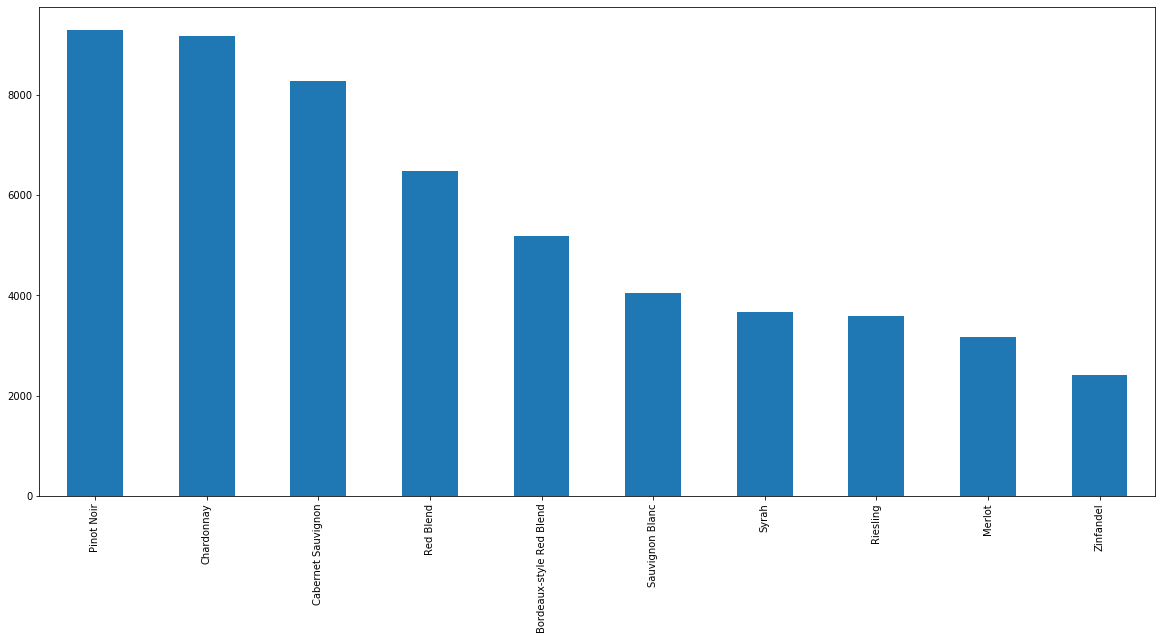

In [16]:
variety1 = data1["variety"].value_counts()
stans(variety1, len1)

number of classes: 707
number of missing data: 1
the top 10 classes:
 Pinot Noir                  12278
Chardonnay                  10868
Cabernet Sauvignon           8840
Red Blend                    8243
Bordeaux-style Red Blend     6471
Riesling                     4773
Sauvignon Blanc              4575
Syrah                        3828
Rosé                         3220
Merlot                       2896
Name: variety, dtype: int64


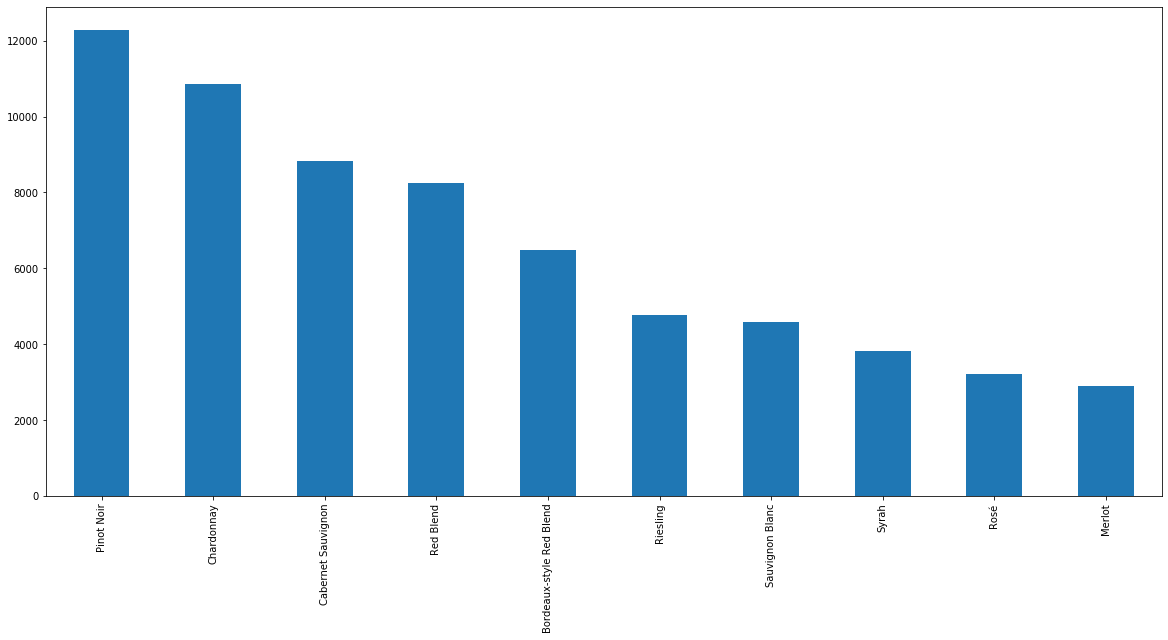

In [17]:
variety2 = data2["variety"].value_counts()
stans(variety2, len2)

### 葡萄酒厂分布情况

number of classes: 14810
number of missing data: 0
the top 10 classes:
 Williams Selyem          235
Testarossa               171
Chateau Ste. Michelle    156
Columbia Crest           152
DFJ Vinhos               148
Concha y Toro            132
Georges Duboeuf          129
Kendall-Jackson          125
Joseph Drouhin           121
Trapiche                 120
Name: winery, dtype: int64


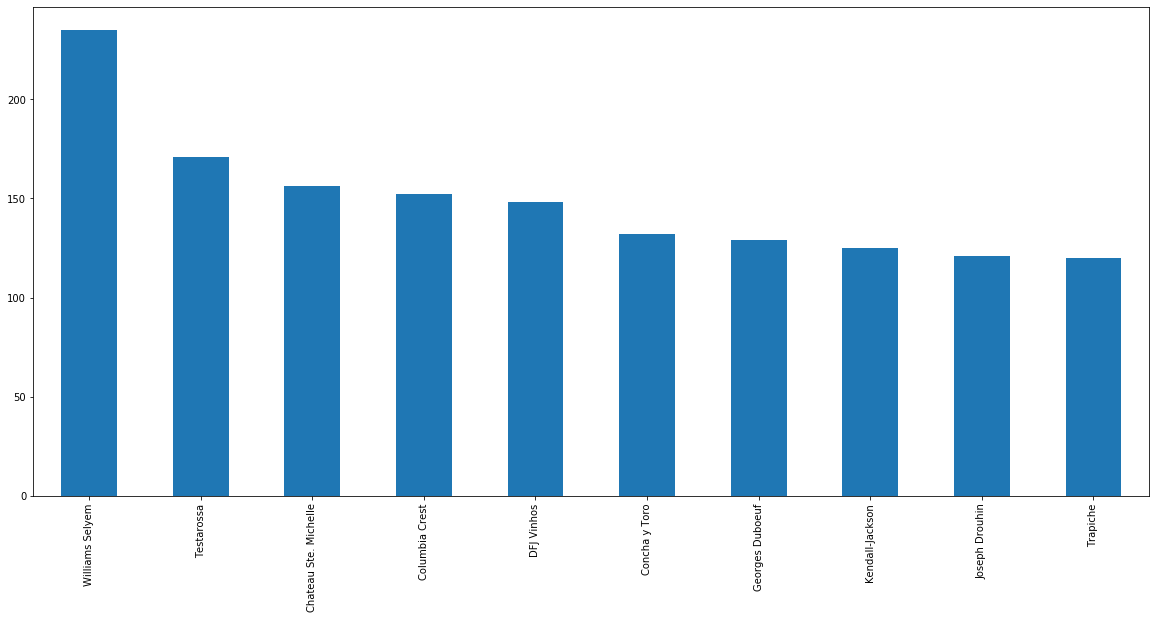

In [18]:
winery1 = data1["winery"].value_counts()
stans(winery1, len1)

number of classes: 16757
number of missing data: 0
the top 10 classes:
 Wines & Winemakers       211
Williams Selyem          204
Testarossa               201
DFJ Vinhos               200
Louis Latour             192
Georges Duboeuf          186
Chateau Ste. Michelle    171
Concha y Toro            154
Columbia Crest           146
Kendall-Jackson          119
Name: winery, dtype: int64


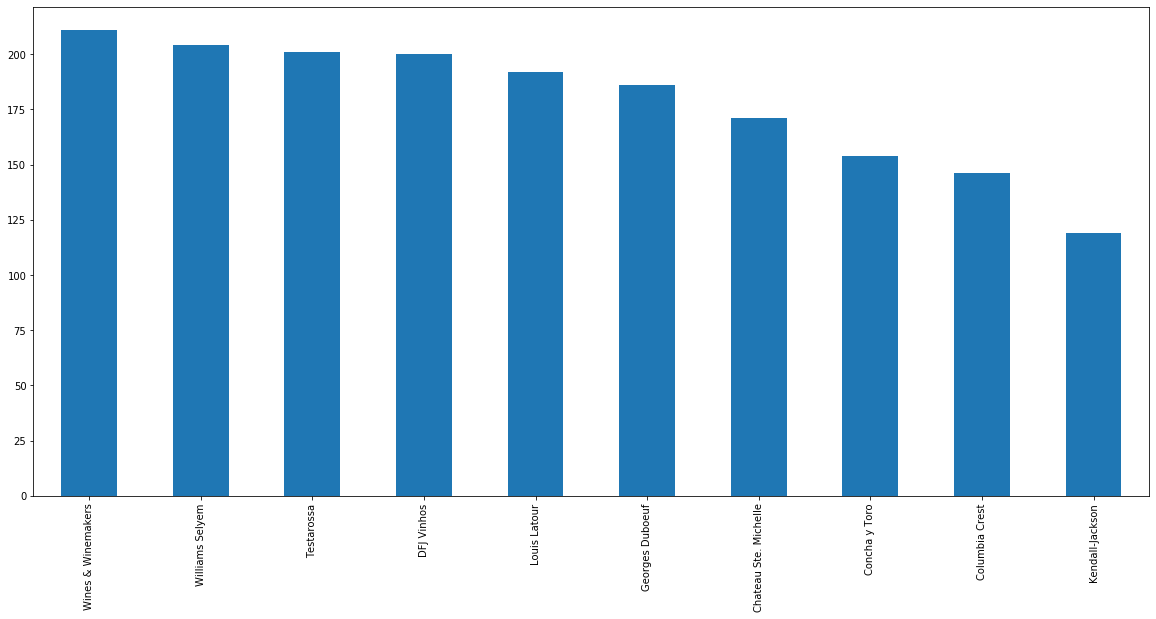

In [19]:
winery2 = data2["winery"].value_counts()
stans(winery2, len2)

number of classes: 19
number of missing data: 24917
the top 10 classes:
 Roger Voss            23560
Michael Schachner     14046
Kerin O’Keefe          9697
Paul Gregutt           8868
Virginie Boone         8708
Matt Kettmann          5730
Joe Czerwinski         4766
Sean P. Sullivan       4461
Anna Lee C. Iijima     4017
Jim Gordon             3766
Name: taster_name, dtype: int64


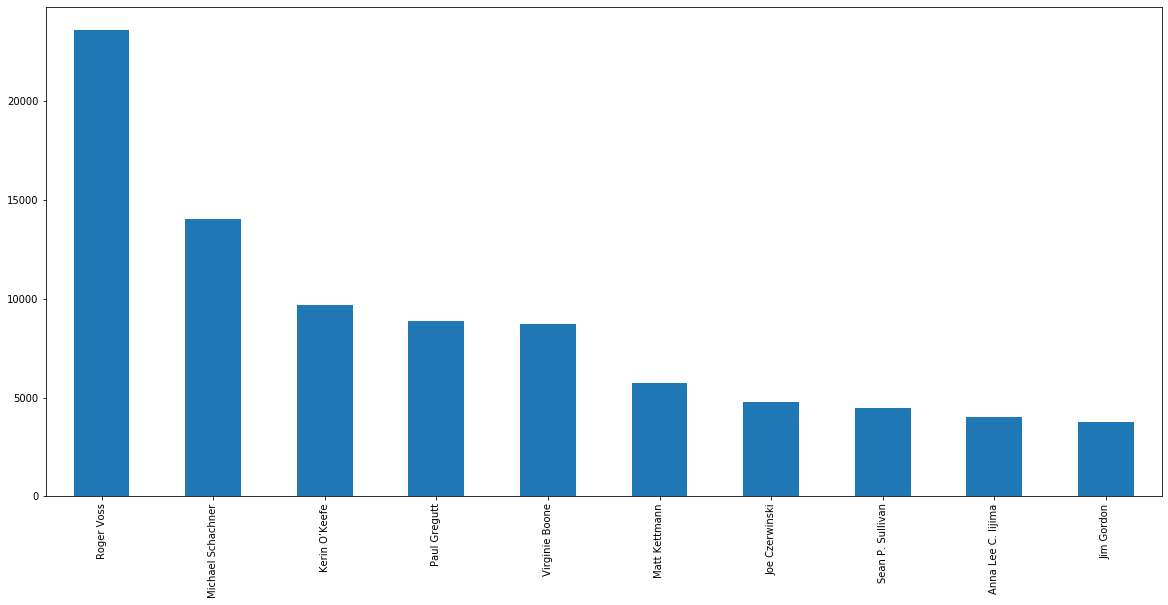

In [20]:
taster_name = data2["taster_name"].value_counts()
stans(taster_name, len2)

number of classes: 15
number of missing data: 29446
the top 10 classes:
 @vossroger          23560
@wineschach         14046
@kerinokeefe         9697
@paulgwine           8868
@vboone              8708
@mattkettmann        5730
@JoeCz               4766
@wawinereport        4461
@gordone_cellars     3766
@AnneInVino          3290
Name: taster_twitter_handle, dtype: int64


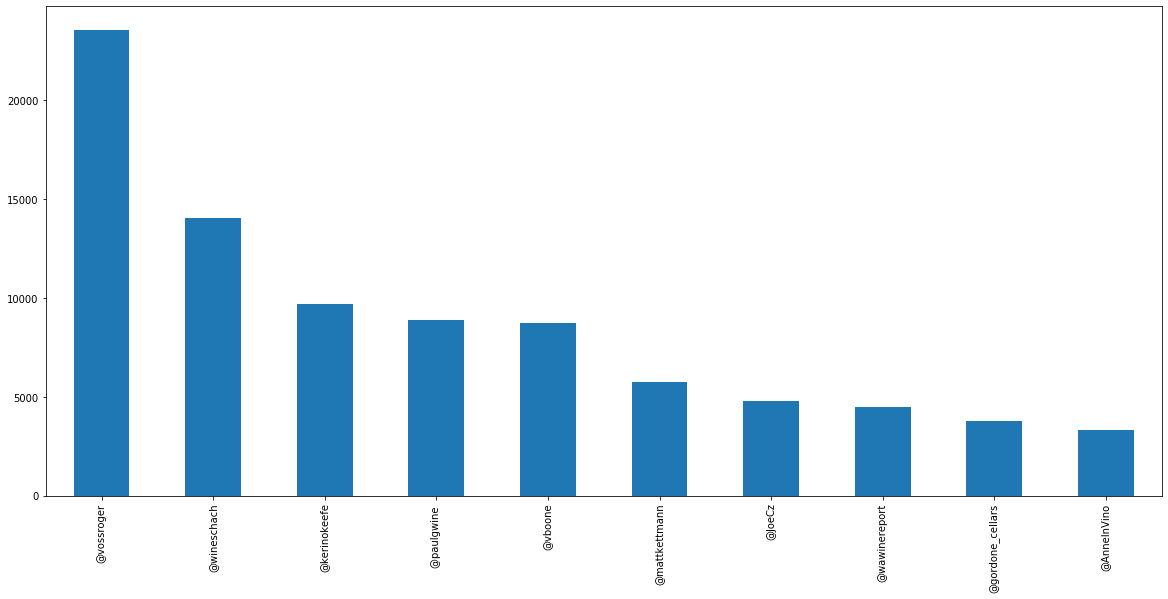

In [21]:
taster_twitter_handle = data2["taster_twitter_handle"].value_counts()
stans(taster_twitter_handle, len2)

number of classes: 118840
number of missing data: 0
the top 10 classes:
 Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)                9
Segura Viudas NV Extra Dry Sparkling (Cava)                           7
Segura Viudas NV Aria Estate Extra Dry Sparkling (Cava)               7
Gloria Ferrer NV Blanc de Noirs Sparkling (Carneros)                  6
Bailly-Lapierre NV Brut  (Crémant de Bourgogne)                       6
J Vineyards & Winery NV Brut Rosé Sparkling (Russian River Valley)    6
Ruinart NV Brut Rosé  (Champagne)                                     6
Korbel NV Brut Sparkling (California)                                 6
Mumm Napa NV Brut Prestige Sparkling (Napa Valley)                    5
Pierre Sparr NV Brut Réserve Sparkling (Crémant d'Alsace)             5
Name: title, dtype: int64


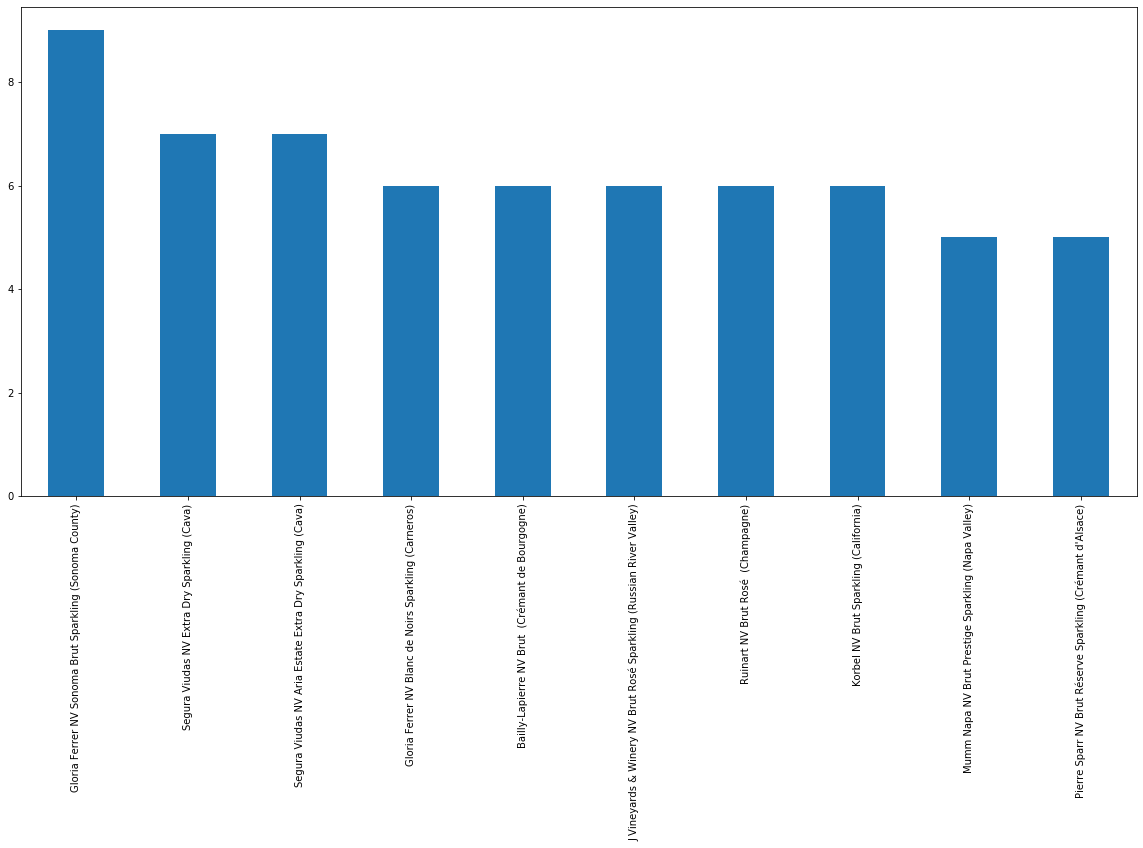

In [22]:
title = data2["title"].value_counts()
stans(title, len2)

## 数值属性分析及可视化展示

### 检查数值属性缺失值个数
我们发现在葡萄酒价格这个数据项存在大量的缺失值，对于存在的缺失值后续会根据不同的情况对其进行缺失值填补。

In [23]:
# 各数据缺失值个数
points1 = data1["points"]
price1 = data1["price"]
print("数据集1")
print("points缺失值个数：", points1.isnull().sum())
print("price缺失值个数：", price1.isnull().sum())

points2 = data2["points"]
price2 = data2["price"]
print("数据集2")
print("points缺失值个数：", points2.isnull().sum())
print("price缺失值个数：", price2.isnull().sum())

数据集1
points缺失值个数： 0
price缺失值个数： 8720
数据集2
points缺失值个数： 0
price缺失值个数： 8395


In [24]:
def fivenumber(num):
    Q1 = np.percentile(num,25)
    Median = np.median(num)
    Q3 = np.percentile(num,75)
    IQR = Q3-Q1
    lower_limit = Q1-1.5*IQR 
    upper_limit = Q3+1.5*IQR
    Minimum = min(num[num>=lower_limit])
    Maximum = max(num[num<=upper_limit])
    return Minimum, Q1, Median, Q3, Maximum

由于数据集中的点数只取了80以上的进行记录，并且不存在缺失值，因此可以简单地对其求无数概况，并可视化的展示分析。

In [25]:
points1 = data1["points"]
points2 = data2["points"]
print("points1五数概括：", fivenumber(points1))
print("points2五数概括：", fivenumber(points2))

points1五数概括： (80, 86.0, 88.0, 90.0, 96)
points2五数概括： (80, 86.0, 88.0, 91.0, 98)


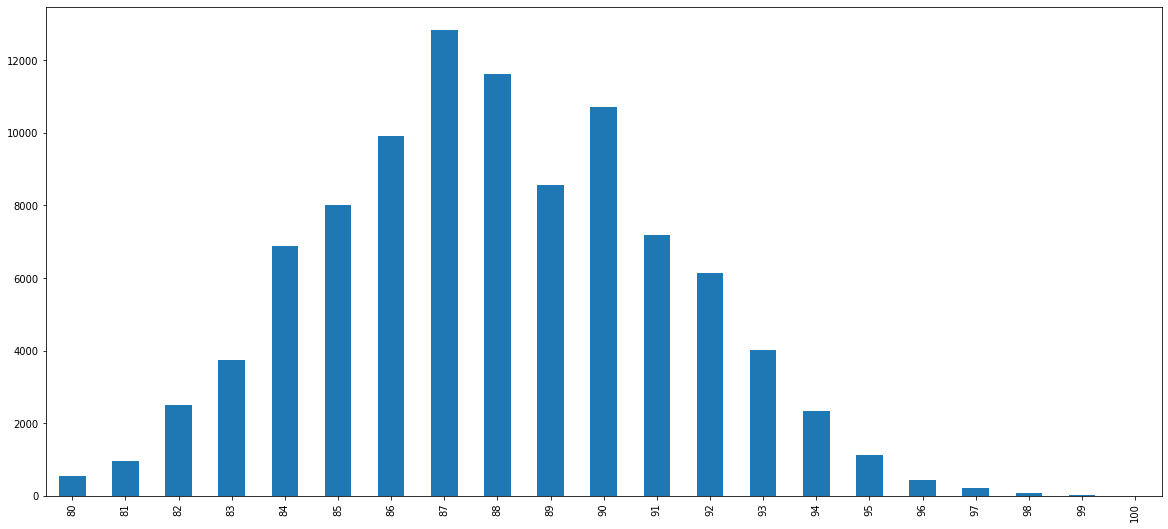

In [26]:
points1 = data1["points"].value_counts()
points1.sort_index().plot(kind="bar", figsize=(20,9))

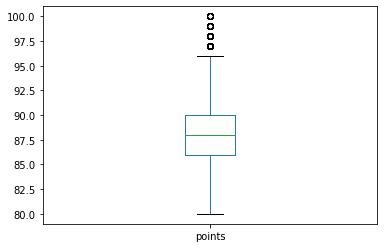

In [27]:
data1["points"].plot.box()

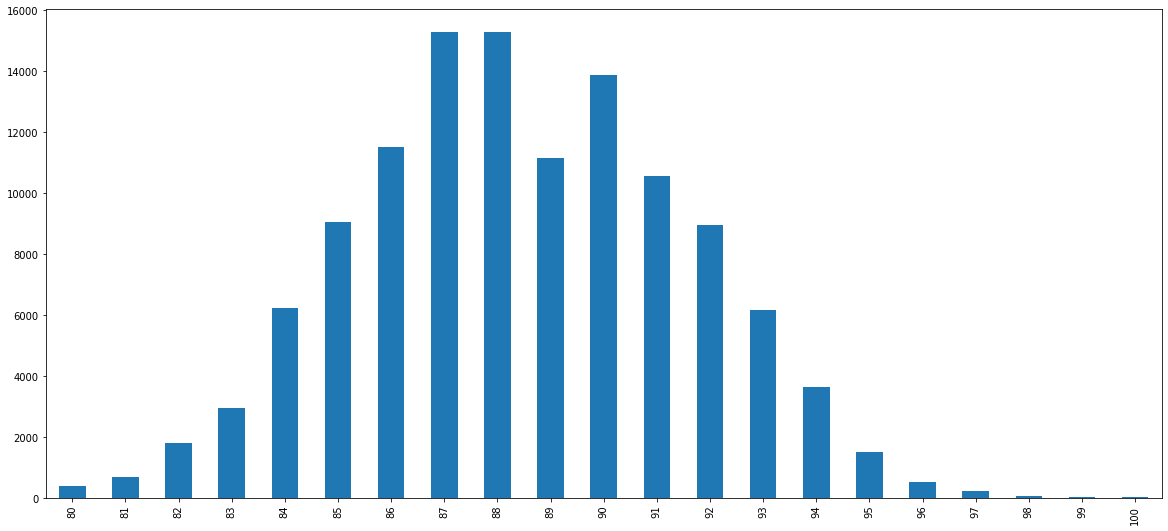

In [28]:
points2 = data2["points"].value_counts()
points2.sort_index().plot(kind="bar", figsize=(20,9))

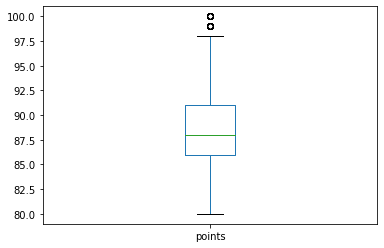

In [29]:
data2["points"].plot.box()

### 缺失值填补
由于价格这一数据项存在大量缺失值，无法直接对其进行分析展示。需要根据不同情况进行缺失值处理，才能继续对数据进行分析展示。同时为了直观的展示进行缺失值处理后的新旧数据集区别，我们还将对地区这一标称属性和点数这一数值属性进行对比。

- 将缺失部分剔除

In [30]:
#将缺失部分剔除
data1_rej = data1.dropna()
data2_rej = data2.dropna()
print(len(data1), len(data2))
print(len(data1_rej), len(data2_rej))

97851 119988
25425 20493


In [31]:
price1_rej = data1_rej["price"]
price2_rej = data2_rej["price"]
print("price1五数概括：", fivenumber(price1_rej))
print("price2五数概括：", fivenumber(price2_rej))

price1五数概括： (4.0, 22.0, 33.0, 48.0, 87.0)
price2五数概括： (4.0, 25.0, 36.0, 50.0, 87.0)


(0, 100)

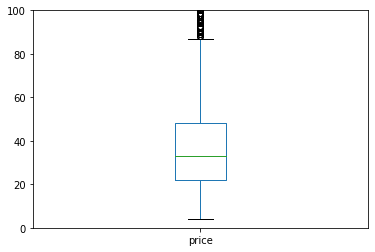

In [32]:
price1_rej.plot.box().set_ylim([0,100])

(0, 100)

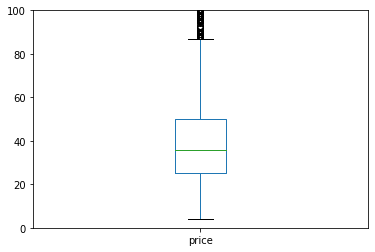

In [33]:
price2_rej.plot.box().set_ylim([0,100])

In [34]:
points1_rej = data1_rej["points"]
points2_rej = data2_rej["points"]
print("points1五数概括：", fivenumber(points1_rej))
print("points2五数概括：", fivenumber(points2_rej))

points1五数概括： (80, 86.0, 88.0, 91.0, 98)
points2五数概括： (82, 88.0, 90.0, 92.0, 98)


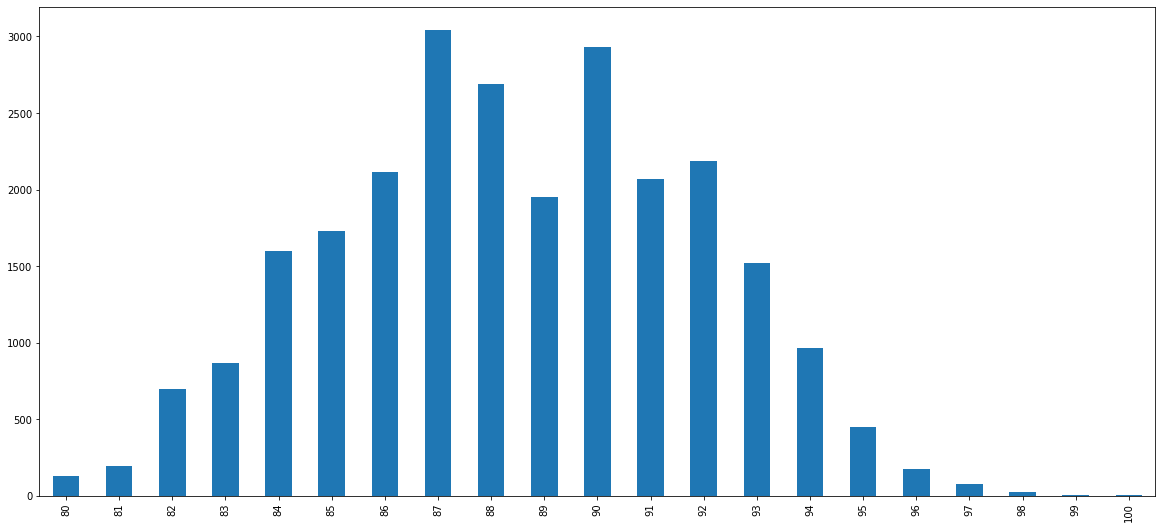

In [35]:
points1_rej = data1_rej["points"].value_counts()
points1_rej.sort_index().plot(kind="bar", figsize=(20,9))

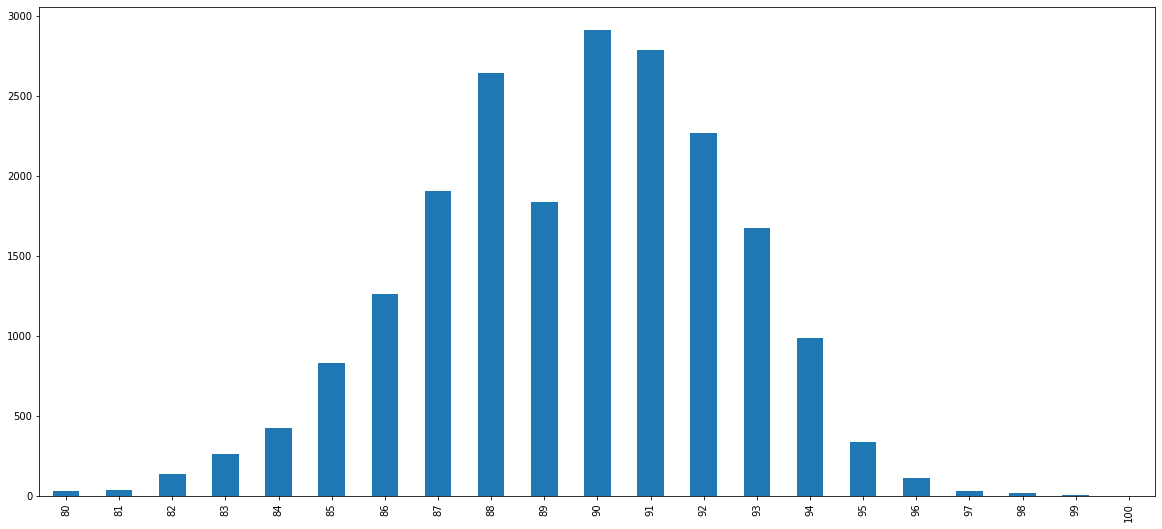

In [36]:
points2_rej = data2_rej["points"].value_counts()
points2_rej.sort_index().plot(kind="bar", figsize=(20,9))

number of classes: 209
number of missing data: 0
the top 10 classes:
 Napa Valley             2335
Columbia Valley (WA)    1924
Russian River Valley    1685
Paso Robles             1293
California               999
Willamette Valley        832
Sonoma Coast             679
Dry Creek Valley         641
Finger Lakes             588
Sonoma County            586
Name: region_1, dtype: int64


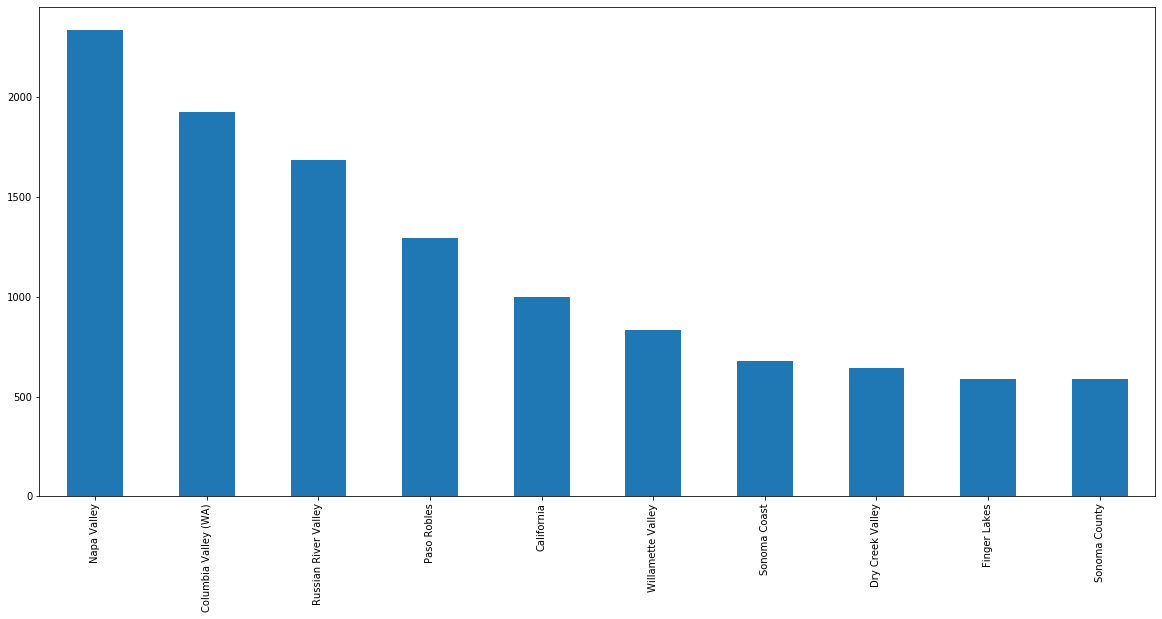

In [37]:
region_11_rej = data1_rej["region_1"].value_counts()
stans(region_11_rej, len(data1_rej))

number of classes: 171
number of missing data: 0
the top 10 classes:
 Columbia Valley (WA)       2281
Willamette Valley          1253
Russian River Valley       1175
Napa Valley                1046
Paso Robles                 838
Walla Walla Valley (WA)     713
Yakima Valley               681
Sonoma Coast                561
Red Mountain                551
California                  533
Name: region_1, dtype: int64


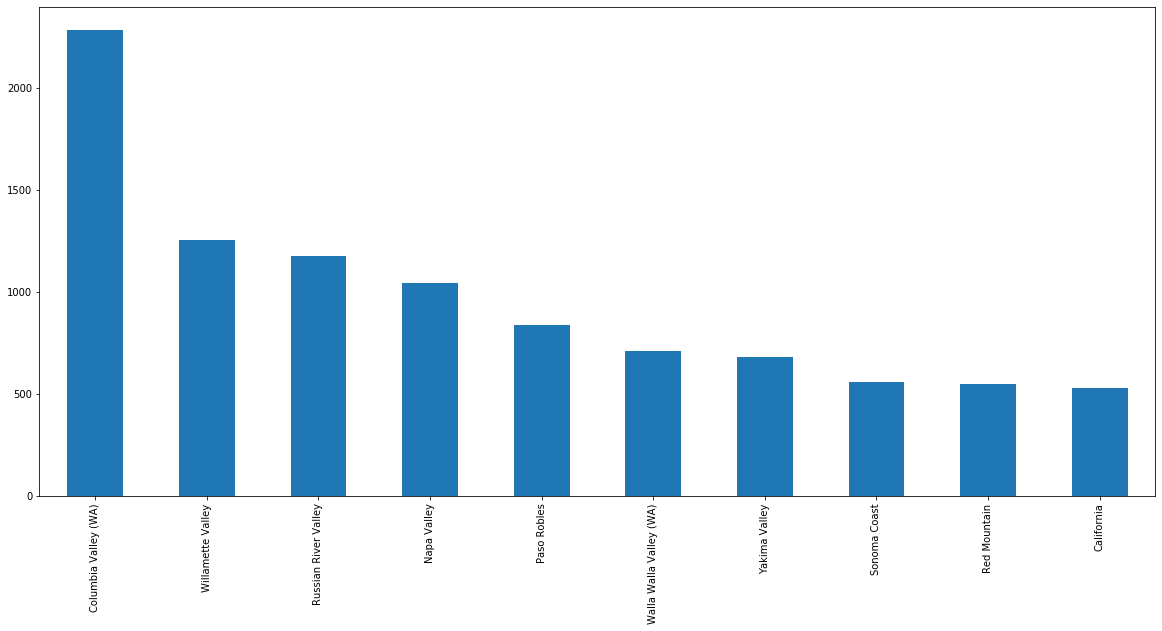

In [38]:
region_12_rej = data2_rej["region_1"].value_counts()
stans(region_12_rej, len(data2_rej))

- 用最高频率值来填补缺失值

In [39]:
# 用最高频率值来填补缺失值
data1_mod = data1.fillna(data1.mode().iloc[0])
data2_mod = data2.fillna(data2.mode().iloc[0])

In [40]:
price1_mod = data1_mod["price"]
price2_mod = data2_mod["price"]
print("price1五数概括：", fivenumber(price1_mod))
print("price2五数概括：", fivenumber(price2_mod))

price1五数概括： (4.0, 17.0, 22.0, 38.0, 69.0)
price2五数概括： (4.0, 18.0, 25.0, 40.0, 73.0)


(0, 100)

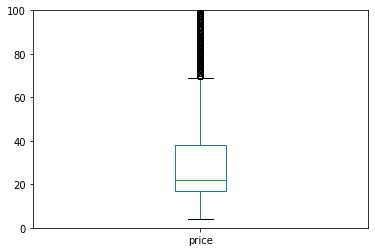

In [41]:
price1_mod.plot.box().set_ylim([0,100])

(0, 100)

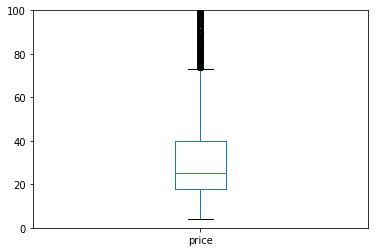

In [42]:
price2_mod.plot.box().set_ylim([0,100])

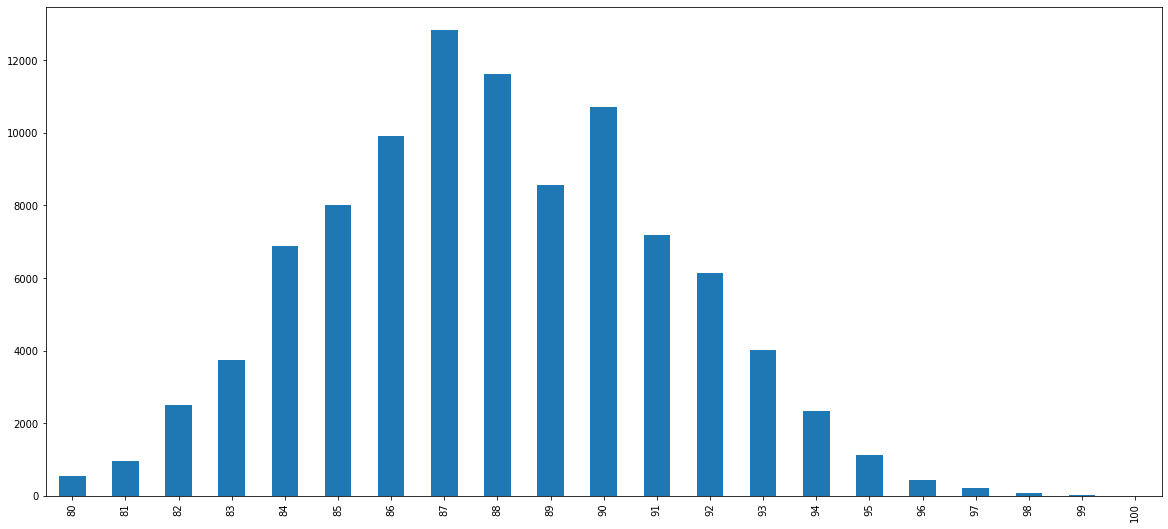

In [43]:
points1_mod = data1_mod["points"].value_counts()
points1_mod.sort_index().plot(kind="bar", figsize=(20,9))

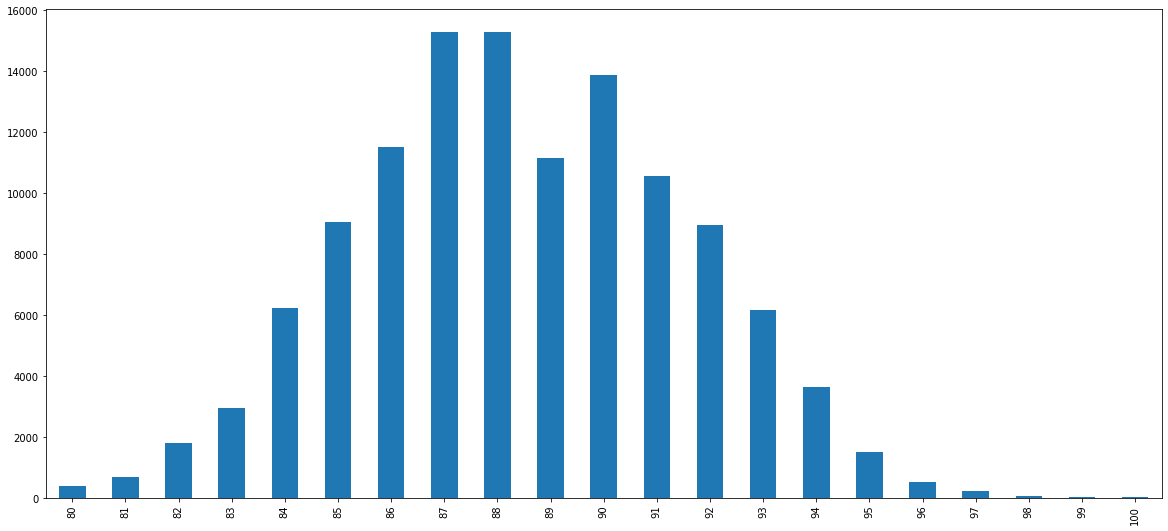

In [44]:
points2_mod = data2_mod["points"].value_counts()
points2_mod.sort_index().plot(kind="bar", figsize=(20,9))

number of classes: 1236
number of missing data: 0
the top 10 classes:
 Napa Valley             20063
Columbia Valley (WA)     3334
Russian River Valley     2302
California               2228
Mendoza                  2199
Paso Robles              1876
Willamette Valley        1276
Rioja                    1252
Alsace                   1241
Sonoma County            1155
Name: region_1, dtype: int64


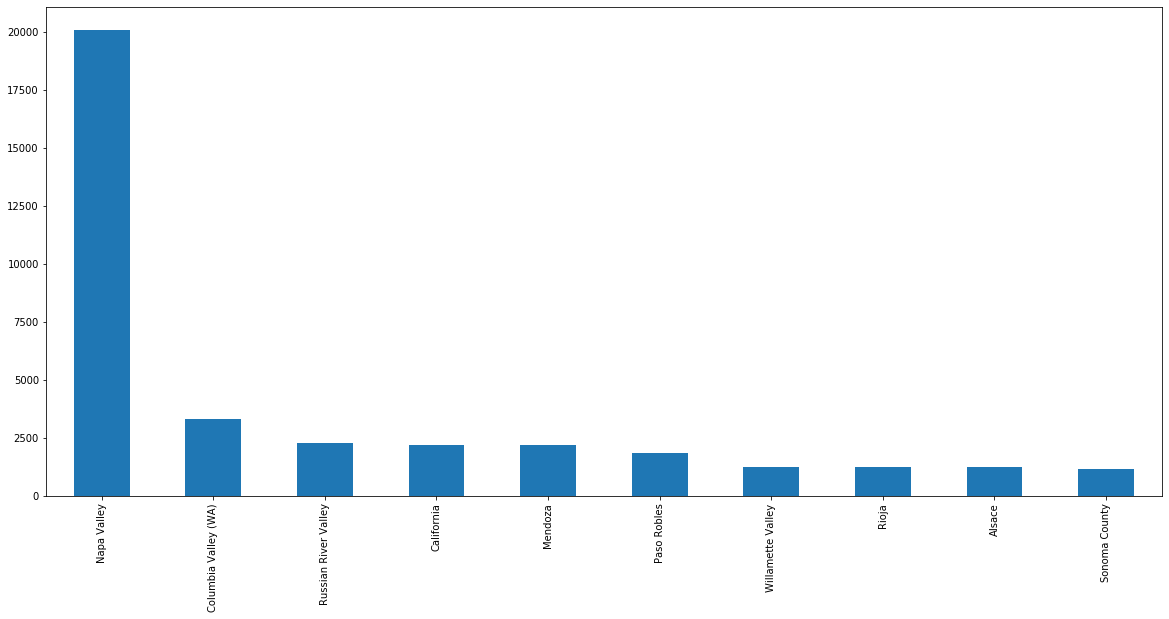

In [45]:
region_11_mod = data1_mod["region_1"].value_counts()
stans(region_11_mod, len(data1_mod))

number of classes: 1229
number of missing data: 0
the top 10 classes:
 Napa Valley             23734
Columbia Valley (WA)     3795
Russian River Valley     2862
California               2468
Paso Robles              2155
Mendoza                  2152
Willamette Valley        2111
Alsace                   1973
Champagne                1498
Barolo                   1493
Name: region_1, dtype: int64


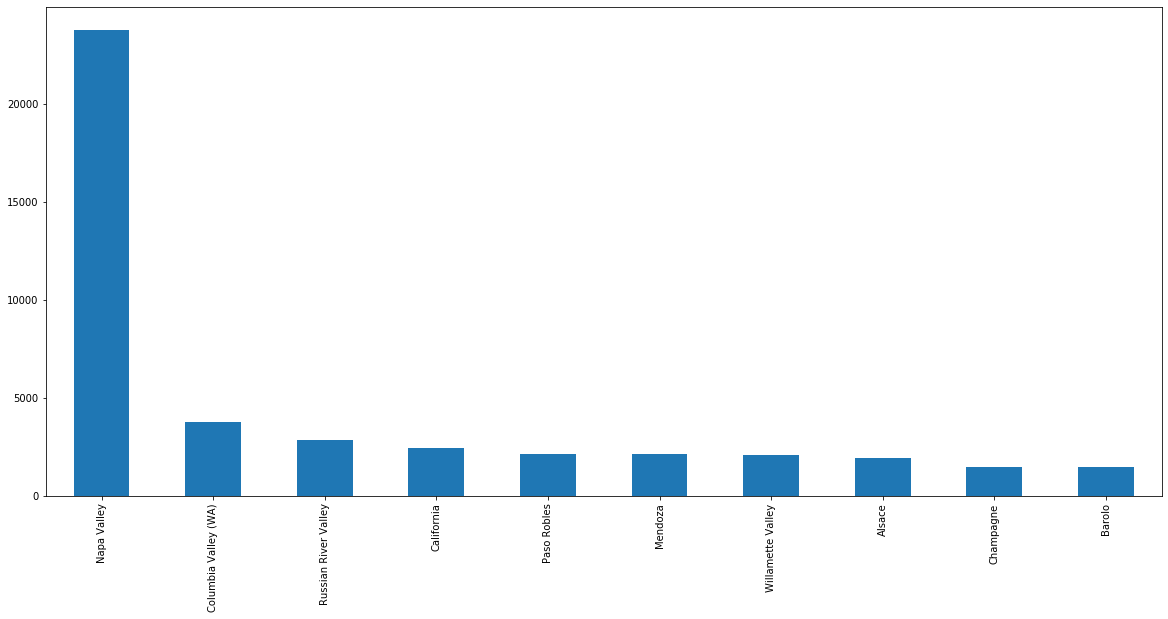

In [46]:
region_12_mod = data2_mod["region_1"].value_counts()
stans(region_12_mod, len(data2_mod))

- 通过属性的相关关系来填补缺失值

In [47]:
# 通过属性的相关关系来填补缺失值
data1_bf = data1.fillna(method = "backfill", axis = 0)
data2_bf = data2.fillna(method = "backfill", axis = 0)

In [48]:
price1_bf = data1_bf["price"]
price2_bf = data2_bf["price"]
print("price1五数概括：", fivenumber(price1_bf))
print("price2五数概括：", fivenumber(price2_bf))

price1五数概括： (4.0, 16.0, 25.0, 40.0, 76.0)
price2五数概括： (4.0, 17.0, 25.0, 43.0, 82.0)


(0, 100)

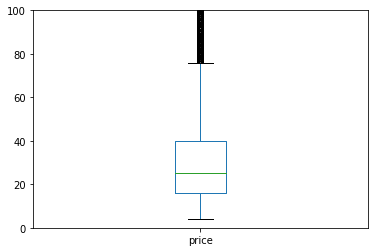

In [49]:
price1_bf.plot.box().set_ylim([0,100])

(0, 100)

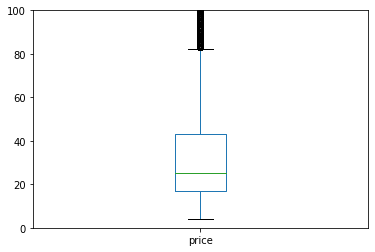

In [50]:
price2_bf.plot.box().set_ylim([0,100])

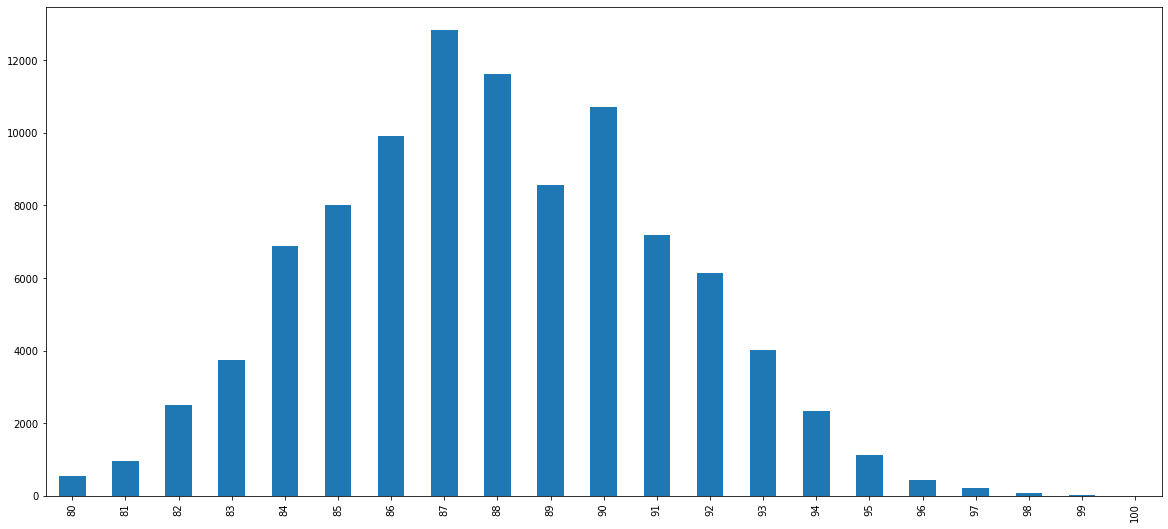

In [51]:
points1_bf = data1_bf["points"].value_counts()
points1_bf.sort_index().plot(kind="bar", figsize=(20,9))

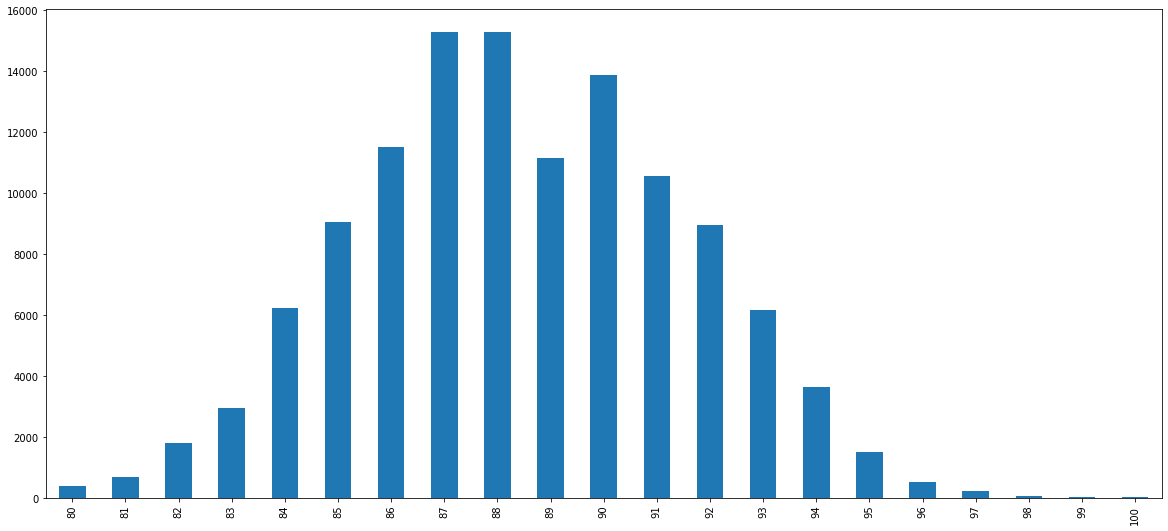

In [52]:
points2_bf = data2_bf["points"].value_counts()
points2_bf.sort_index().plot(kind="bar", figsize=(20,9))

number of classes: 1236
number of missing data: 0
the top 10 classes:
 Napa Valley             4989
Columbia Valley (WA)    3926
Russian River Valley    2813
California              2727
Mendoza                 2574
Paso Robles             2276
Willamette Valley       1629
Rioja                   1507
Sonoma County           1422
Alsace                  1419
Name: region_1, dtype: int64


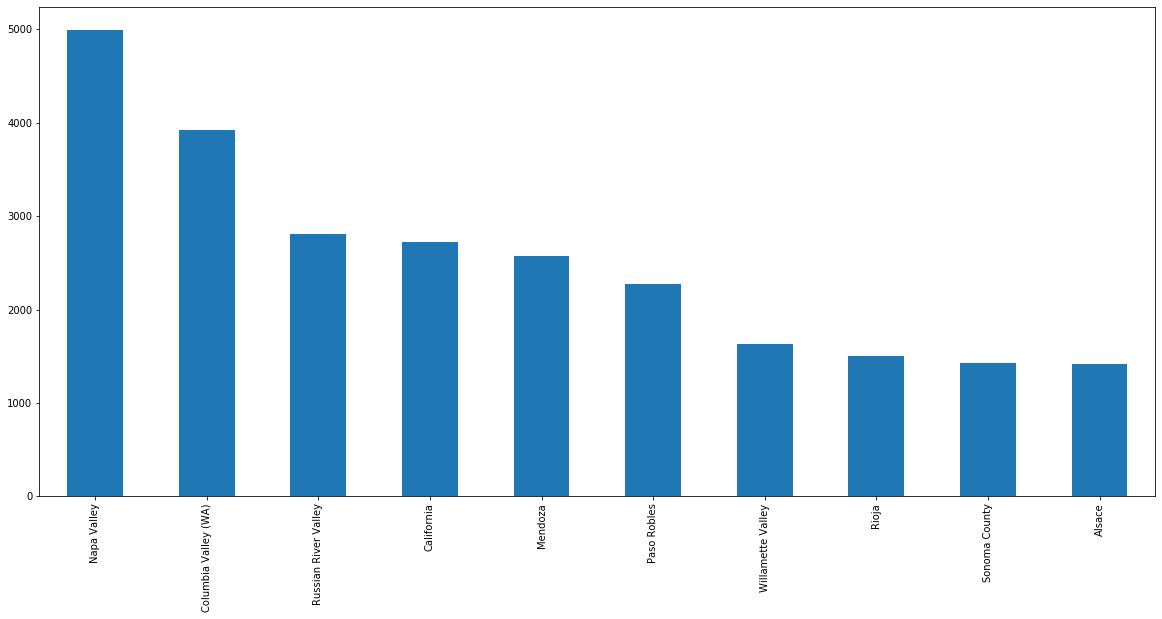

In [53]:
region_11_bf = data1_bf["region_1"].value_counts()
stans(region_11_bf, len(data1_bf))

number of classes: 1229
number of missing data: 0
the top 10 classes:
 Napa Valley             4999
Columbia Valley (WA)    4477
Russian River Valley    3462
California              2988
Willamette Valley       2629
Mendoza                 2591
Paso Robles             2545
Alsace                  2294
Barolo                  1784
Champagne               1767
Name: region_1, dtype: int64


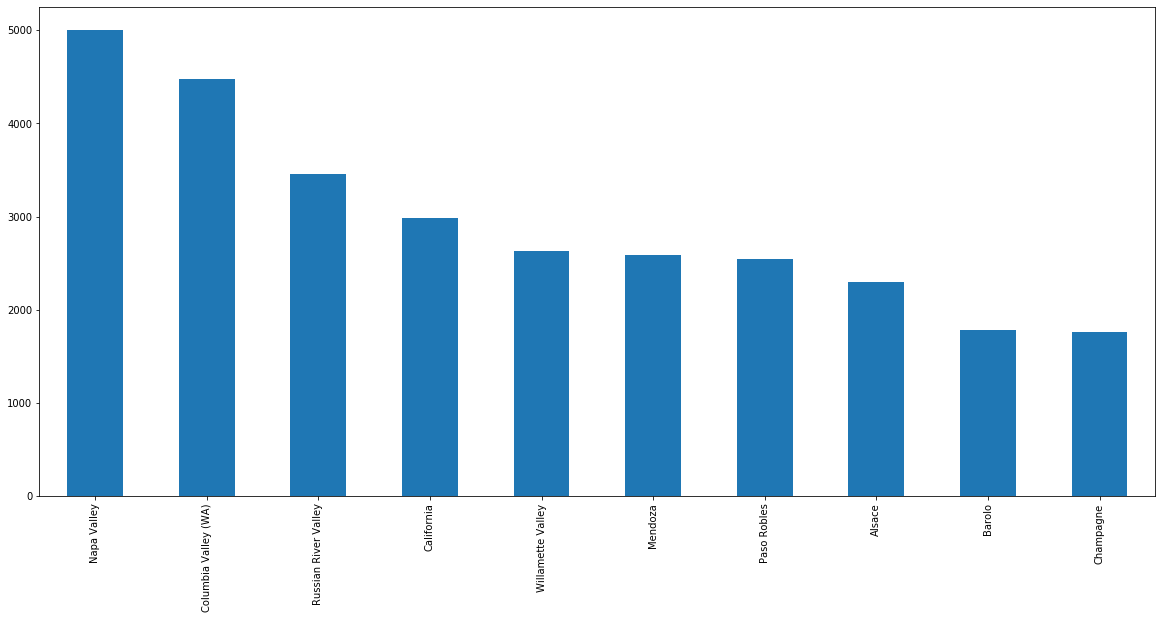

In [54]:
region_12_bf = data2_bf["region_1"].value_counts()
stans(region_12_bf, len(data2_bf))

- 通过数据对象之间的相似性来填补缺失值

In [55]:
# 通过数据对象之间的相似性来填补缺失值
data1_int = data1.fillna(data1.median())
data2_int = data2.fillna(data1.median())

In [58]:
price1_int = data1_int["price"]
price2_int = data2_int["price"]
print("price1五数概括：", fivenumber(price1_int))
print("price2五数概括：", fivenumber(price2_int))

price1五数概括： (4.0, 17.0, 25.0, 38.0, 69.0)
price2五数概括： (4.0, 18.0, 25.0, 40.0, 73.0)


(0, 100)

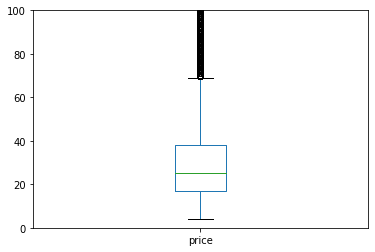

In [59]:
price1_int.plot.box().set_ylim([0,100])

(0, 100)

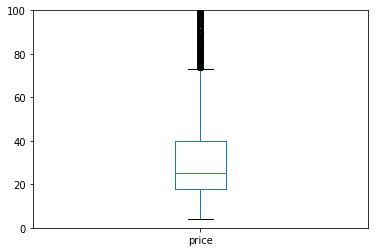

In [60]:
price2_int.plot.box().set_ylim([0,100])

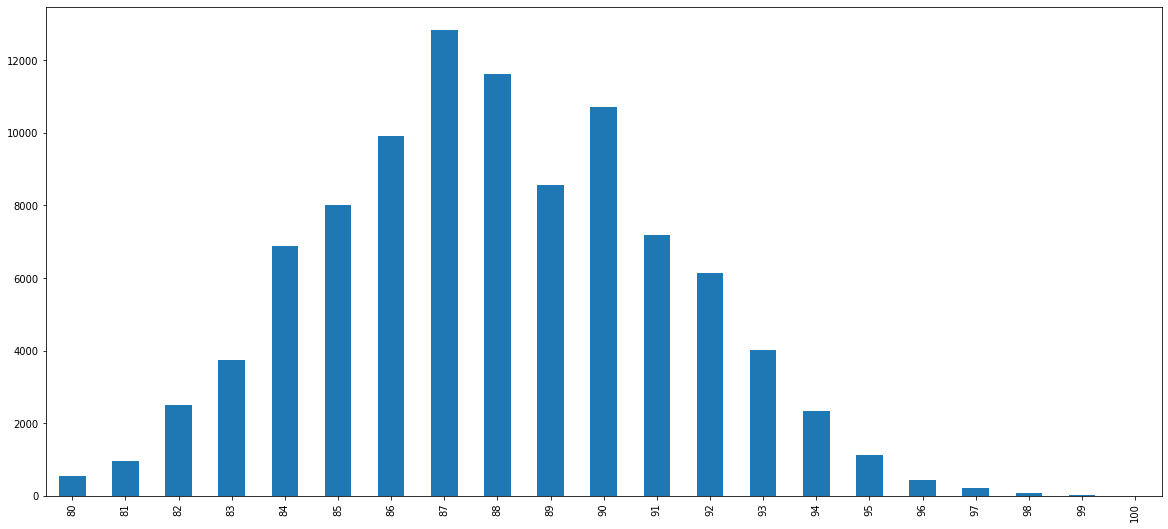

In [61]:
points1_int = data1_int["points"].value_counts()
points1_int.sort_index().plot(kind="bar", figsize=(20,9))

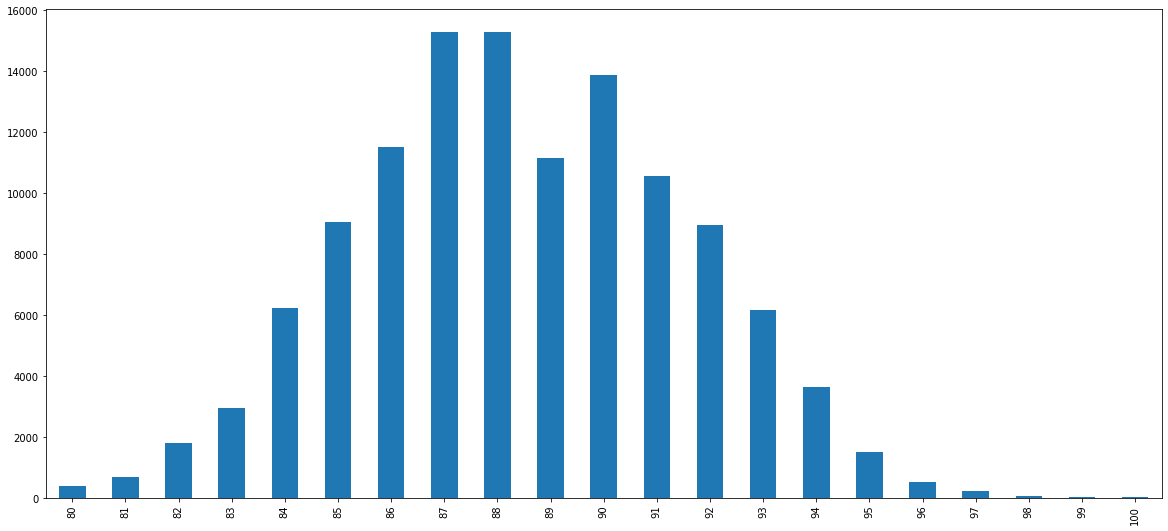

In [62]:
points2_int = data2_int["points"].value_counts()
points2_int.sort_index().plot(kind="bar", figsize=(20,9))